In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list) # A

[624.1, 175.10000000000002, 300.5, 78.9]


In [43]:
def initialize_params():
    #w1 = random.gauss(mu=0.0, sigma=0.01)
    #w2 = random.gauss(mu=0.0, sigma=0.01)
    #w3 = random.gauss(mu=0.0, sigma=0.01)
    #b = 0

    # for exercise, I choose the fixed weights
    w1 , w2 , w3 , b = (0.016992259082509283, 
                        0.0070783670518262355,
                        -0.002307860847821344,
                        0)

    return w1, w2, w3, b

In [44]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

temp = predict(1, 1, 1, 0, 0.5, 0, 0.5)
print(temp) # A

1.0


In [45]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y) ** 2

l = compute_loss_mse(1, 0.5)
print(l) # A

0.25


In [46]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat-y) * xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat-y)
    return dl_db

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi) # A
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print(g_b) # B


-1.0
-3.0


In [47]:
def update_weight_wi(wi, dl_dwi, lr):
    wi -= lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b -= lr*dl_db
    return b

after_wi = update_weight_wi(wi =1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi) # A
after_b = update_weight_b(b =0.5, dl_db = -1.0, lr = 1e-5)
print(after_b) # A


1.000005
0.50001


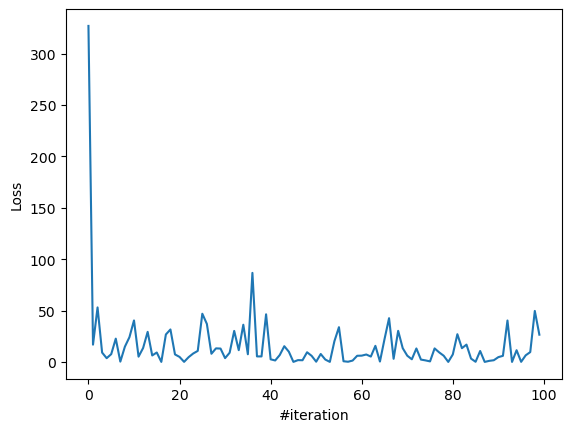

In [48]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y, y_hat)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)
    return (w1, w2, w3, b, losses)

(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()


In [50]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1 ,w2 ,w3) # A

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [51]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression (X, y ,epoch_max =50, lr =1e-5)
sales = predict(tv, radio, newspaper, w1 ,w2 , w3, b)
print(f'predicted sales is { round(sales, 2) }') # B

predicted sales is 8.18


In [52]:
def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)

l = compute_loss_mae(y_hat=1, y=0.5)
print(l) # A

0.5


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

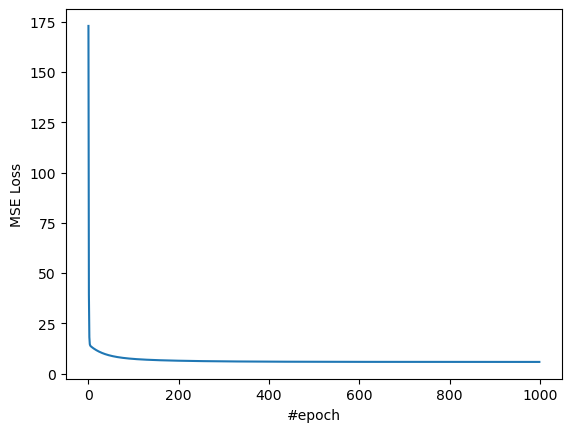

In [56]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Training loop
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
print(w1, w2, w3)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

0.06710990754044266 0.15756173831487585 0.029619799386084403


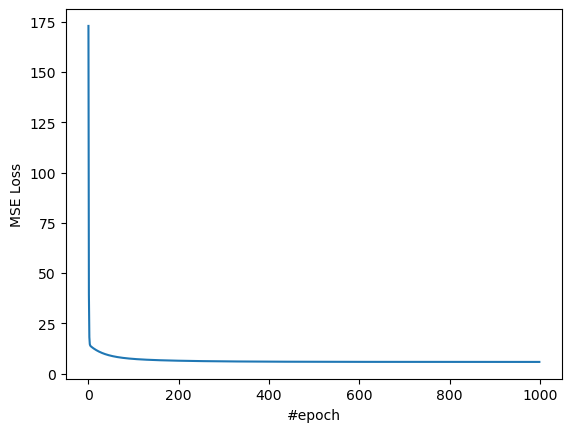

In [57]:
X, y = prepare_data('advertising.csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [58]:
def prepare_data(file_name_dataset):
    # Load data from CSV file, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Extract columns for TV, Radio, Newspaper, and Sales
    tv_data = get_column(data, 0)        # TV data (index = 0)
    radio_data = get_column(data, 1)     # Radio data (index = 1)
    newspaper_data = get_column(data, 2) # Newspaper data (index = 2)
    sales_data = get_column(data, 3)     # Sales data (index = 3)

    # Build X (input features) and y (output) for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y


In [97]:
def predict(X_features, weights):
    result = np.dot(X_features, weights)
    return result


def compute_loss(y_hat, y):
    return (y_hat - y) ** 2


# Compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = []
    dl_dweights.append(2*(y_hat-y))
    for i in range(1, len(X_features)):
        dl_dweights.append(2 * (y_hat-y) * X_features[i])
    return dl_dweights


# Update weights
def update_weight(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] -= lr*dl_dweights[i]
    return weights


In [98]:
def initialize_params():
    # Initialize bias and weights with random values from a normal distribution
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # Return the initialized parameters (for a real application, these values would vary)
    # Comment the following line for actual usage
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]


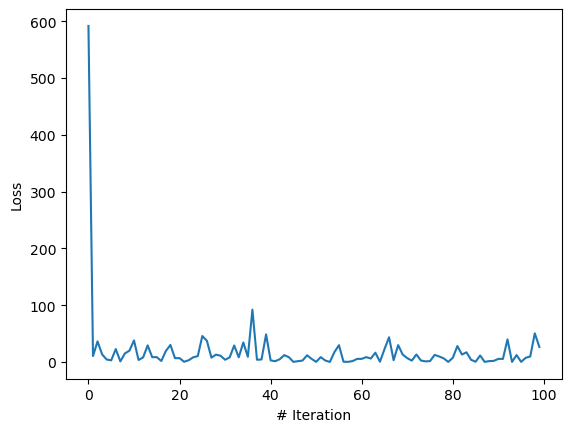

In [100]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses


# Prepare data and run the linear regression
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)

# Plot the loss curve
plt.plot(L[0:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()


In [101]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X , y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999]) # A

31.33922340810991
